# Scientific Computing and Data Management Practical 3
## Making a map of the Southern Ocean (60°S to 90°S) and Antarctica
### The following packages need to be imported

In [4]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

/Users/benhenderson/anaconda3/envs/AOS/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/benhenderson/anaconda3/envs/AOS/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


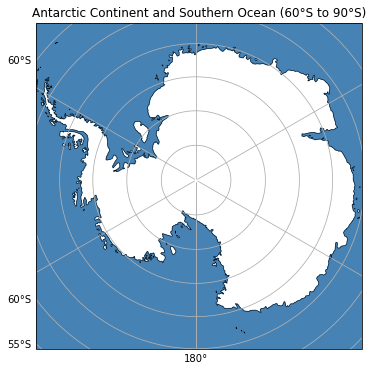

In [5]:
central_lon, central_lat  = 0, -90

extents = [-180, 180, -90, -65]

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection':ccrs.Orthographic(central_lon, central_lat)})

ax.set_extent(extents, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='white')
ax.add_feature(cfeature.OCEAN, color = "steelblue")
ax.coastlines(resolution='50m', linewidth=0.5)
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
ax.set_title('Antarctic Continent and Southern Ocean (60°S to 90°S)')

plt.show()

### Another way to render the land and the ocean features is to overlay satellite imagery

/Users/benhenderson/anaconda3/envs/AOS/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/benhenderson/anaconda3/envs/AOS/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


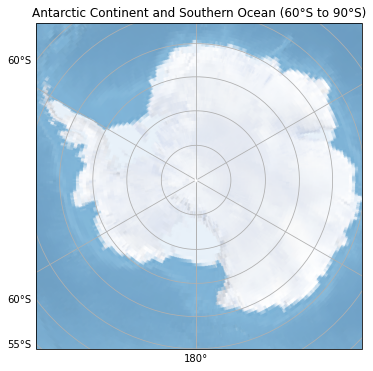

In [6]:
central_lon, central_lat  = 0, -90

extents = [-180, 180, -90, -65]

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection':ccrs.Orthographic(central_lon, central_lat)})

ax.set_extent(extents, crs=ccrs.PlateCarree())
ax.stock_img()
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
ax.set_title('Antarctic Continent and Southern Ocean (60°S to 90°S)')

plt.show()

### Change the color and linewidth of the gridlines to make them more visible

/Users/benhenderson/anaconda3/envs/AOS/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/benhenderson/anaconda3/envs/AOS/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


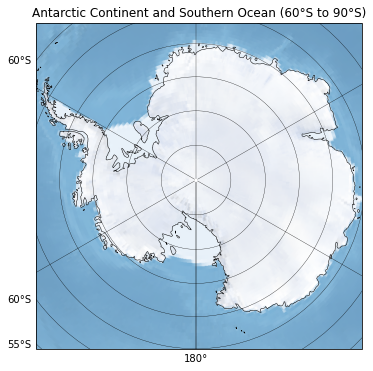

In [7]:
central_lon, central_lat  = 0, -90

extents = [-180, 180, -90, -65]

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection':ccrs.Orthographic(central_lon, central_lat)})

ax.set_extent(extents, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='white')
ax.add_feature(cfeature.OCEAN, color = "steelblue")
ax.stock_img()
ax.coastlines(resolution='50m', linewidth=0.5)
gl = ax.gridlines(draw_labels=True, color = "black", linewidth = 0.3)
gl.xlabels_top = False
gl.ylabels_right = False

ax.set_title('Antarctic Continent and Southern Ocean (60°S to 90°S)')

plt.show()

An Orthographic projection is used in this case because it provides a sense of 3 dimensions for the chosen area. This projection type is also most effective when displaying an area from a single hemisphere and hence it is effective in this case of mapping an area far South on the globe (ArcGIS Pro).

## Making a map of the South Atlantic, from 20°S to 50°S

### Including the locations of the following citites **Walvis Bay, Cape Town, Rio de Janeiro, Montevideo**

In [8]:
from geopy.geocoders import Nominatim

/Users/benhenderson/anaconda3/envs/AOS/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/benhenderson/anaconda3/envs/AOS/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


[Location(Walvis Bay, Erongo Region, 13013, Namibia, (-22.9557607, 14.5071125, 0.0)), Location(Cape Town, City of Cape Town, Western Cape, 8001, South Africa, (-33.928992, 18.417396, 0.0)), Location(Rio de Janeiro, Região Geográfica Imediata do Rio de Janeiro, Região Metropolitana do Rio de Janeiro, Região Geográfica Intermediária do Rio de Janeiro, Rio de Janeiro, Southeast Region, Brazil, (-22.9110137, -43.2093727, 0.0)), Location(Montevideo, Uruguay, (-34.9058916, -56.1913095, 0.0))]


Text(0.5, 1.0, 'Southern Atlantic Ocean (20°S to 50°S)')

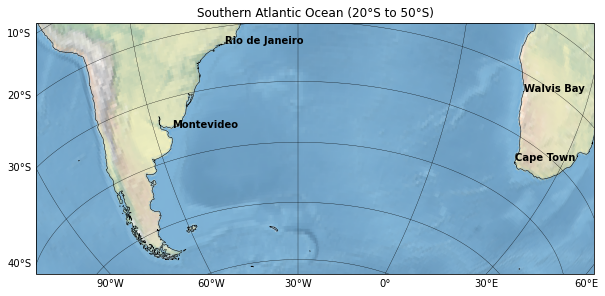

In [9]:
central_lon = -30  
central_lat = -35  

extents = [-80, 30, -48, -12]  

fig, ax = plt.subplots(subplot_kw={'projection':ccrs.Orthographic(central_longitude=central_lon, central_latitude=central_lat)}, figsize=(10, 8))

ax.set_extent(extents)
ax.coastlines(resolution='50m', linewidth=0.5)
ax.stock_img()
gl = ax.gridlines(draw_labels=True, color = 'black', linewidth = 0.3)
gl.xlabels_top = False
gl.ylabels_right = False

place = ['Walvis Bay', 'Cape Town', 'Rio de Janeiro', 'Montevideo']
address = []

geolocator = Nominatim(user_agent = 'educational')
for p in place:
    loc = geolocator.geocode(p, language = "en")
    address.append(loc)
    
print(address)

for p in range(len(place)):
    ax.text(address[p].longitude, address[p].latitude, place[p], transform = ccrs.Geodetic(), fontweight = 'bold')
    
ax.set_title('Southern Atlantic Ocean (20°S to 50°S)')


Again, an `Orthographic` map projection has been used to plot this map.  Once again this is the case because we are dealing with extents only in the Southern Hemisphere, which means an Orthographic projection can handle this area adequately.  It Also keeps the globe effect that represents the shape the rest of the globe. 

The `PlateCarree` projection is used to set the spatial extents of the plot in the form of a latitudinal and longitudinal grid.

## Applying 3 different coastline coastline resolutions from the GSHHG database to False Bay

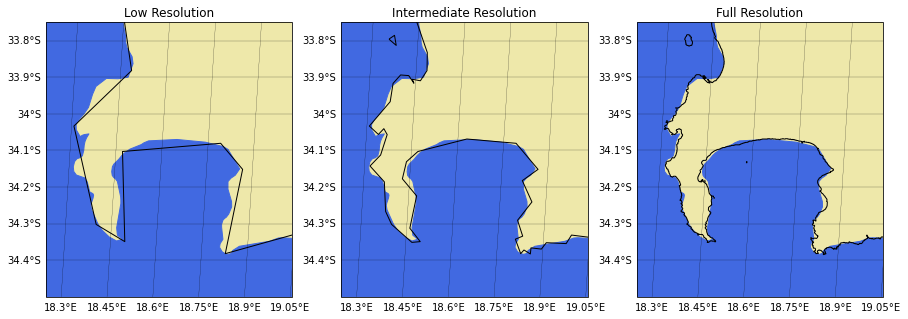

In [10]:
central_lon, central_lat = 18, -34.5

extent = [18.25, 19, -33.75, -34.5]

fig, ax = plt.subplots(1, 3, figsize = (15, 6), subplot_kw = {'projection':ccrs.Robinson()})

# Low resolution coastline
cl_low = cfeature.GSHHSFeature(scale = 'l')
ax[0].set_extent(extent)
gl0 = ax[0].gridlines(draw_labels = True, color = 'black', linewidth = 0.2)
ax[0].add_feature(cl_low)
ax[0].add_feature(cfeature.LAND, color = "palegoldenrod")
ax[0].add_feature(cfeature.OCEAN, color = "royalblue")
ax[0].set_title('Low Resolution')
gl0.right_labels = False
gl0.top_labels = False


# Intermediate resolution coastline
cl_intermediate = cfeature.GSHHSFeature(scale='i')
ax[1].set_extent(extent)
gl1 = ax[1].gridlines(draw_labels = True, color = 'black', linewidth = 0.2)
ax[1].add_feature(cl_intermediate)
ax[1].add_feature(cfeature.LAND, color = "palegoldenrod")
ax[1].add_feature(cfeature.OCEAN, color = "royalblue")
ax[1].set_title('Intermediate Resolution')
gl1.right_labels = False
gl1.top_labels = False


# Full resolution coastline
cl_full = cfeature.GSHHSFeature(scale = 'f')
ax[2].set_extent(extent)
gl2 = ax[2].gridlines(draw_labels = True, color = 'black', linewidth = 0.2)
ax[2].add_feature(cl_full)
ax[2].add_feature(cfeature.LAND, color = "palegoldenrod")
ax[2].add_feature(cfeature.OCEAN, color = "royalblue")
ax[2].set_title('Full Resolution')
gl2.right_labels = False
gl2.top_labels = False

plt.show()

The projection `Robinson` is used in this case.  It is impossible to accurately present the world map on a flat surface without having some kind of distrotion, either angularly, distance wise and area wise.  The Robinson projection has all of these distortions however the tradeoffs between them are typicall within acceptable limits and that is why it has been chosen in the case (QGIS).

## Online Sources:

ArcGIS Pro: 

* https://pro.arcgis.com/en/pro-app/3.1/help/mapping/properties/plate-carree.htm#:~:text=This%20projection%20can%20be%20used,%2C%20for%20example%2C%20time%20zones.
* https://pro.arcgis.com/en/pro-app/3.1/help/mapping/properties/orthographic.htm

QGIS:

* https://docs.qgis.org/3.4/en/docs/gentle_gis_introduction/coordinate_reference_systems.html#figure-plate-caree-projection